# MNE-Python Basic Preprocess
https://mne.tools/stable/documentation/index.html

In [34]:
import pyxdf
import mne
import numpy as np
streams, header = pyxdf.load_xdf("Pipo_1_5_test1.xdf") #Example Data from Lab Recoder

In [35]:
streams

[{'info': defaultdict(list,
              {'name': ['psychopy_marker_stream'],
               'type': ['Markers'],
               'channel_count': ['1'],
               'channel_format': ['int32'],
               'source_id': ['myuniqueid1234'],
               'nominal_srate': ['0.000000000000000'],
               'version': ['1.100000000000000'],
               'created_at': ['6559.231469500000'],
               'uid': ['2dd98285-7fe6-43d0-8a35-058565ea7c72'],
               'session_id': ['default'],
               'hostname': ['LAPTOP-J323FJ6E'],
               'v4address': [None],
               'v4data_port': ['16573'],
               'v4service_port': ['16573'],
               'v6address': [None],
               'v6data_port': ['16573'],
               'v6service_port': ['16573'],
               'desc': [None],
               'stream_id': 1,
               'effective_srate': 0}),
  'footer': {'info': defaultdict(list,
               {'first_timestamp': ['6577.4774858'],
         

In [36]:
raw_data = streams[1]["time_series"].T #From Steam variable this query is EEG data

In [37]:
raw_data.shape # It contain with 8 channel of EGG data

(8, 49650)

In [38]:
channels = ['CH1','CH2','CH3','CH4','CH5','CH6','CH7','CH8'] #Set your target EEG channel name
info = mne.create_info(
    ch_names= channels,
    ch_types= ['eeg']*len(channels),
    sfreq= 250 #OpenBCI Frequency acquistion
)
# Create MNE rawarray
raw_mne = mne.io.RawArray(raw_data, info, verbose=False)

In [39]:
raw_mne

<RawArray | 8 x 49650 (198.6 s), ~3.0 MB, data loaded>

# Create MNE Epoch

In [40]:
event_index = streams[0]["time_series"].T[0] #Get all event marker of experiment 
event_timestamp = streams[0]["time_stamps"].T #Timestamp when event marked

In [41]:
event_index

array([4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5,
       6, 1, 2, 3])

In [42]:
event_timestamp

array([6577.47746129, 6578.96006491, 6588.9573839 , 6589.46265957,
       6590.95794929, 6600.97622168, 6601.45916035, 6602.95696927,
       6612.95849056, 6613.47542153, 6614.97553605, 6624.97612214,
       6625.45765391, 6626.97696553, 6636.95784102, 6637.46031589,
       6638.95872021, 6648.95977409, 6649.45945207, 6650.97530669,
       6660.95743477, 6661.45753405, 6662.95911737, 6672.95782935,
       6673.45970973, 6674.98973855, 6684.95911323, 6685.47512741,
       6686.95719103, 6696.95883891, 6697.47262559, 6698.97793571,
       6708.95922889, 6709.45965277, 6710.97578119, 6720.99230487,
       6721.47708475, 6722.97815497, 6732.97797875, 6733.45803463,
       6734.97728795, 6744.96044753, 6745.4630571 , 6746.99301153,
       6756.96130511, 6757.45860718, 6758.96445081, 6768.95817999])

In [43]:
events = np.column_stack((np.array(event_timestamp, dtype = int),
                        np.zeros(len(event_timestamp), dtype = int),
                        np.array(event_index, dtype = int)))

events_id = { # Set up your event name
     'Left cue start': 1,
     'Left stimuli start': 2,
     'Left blank start': 3,
     'Right cue start': 4,
     'Right stimuli start': 5,
     'Right blank start' : 6,
}

mne_epochs = mne.Epochs(raw_mne, events, 
        tmin= -0.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax= 1.5,    # final timestamp (10 means set epoch duration 10 second)
        event_id =events_id,
        preload = True,
        event_repeated='drop',
        baseline=(-0.5, 0)
    )

Not setting metadata
48 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 501 original time points ...
0 bad epochs dropped


In [44]:
mne_epochs

Number of events,48
Events,Left blank start: 8Left cue start: 8Left stimuli start: 8Right blank start: 8Right cue start: 8Right stimuli start: 8
Time range,-0.500 – 1.500 s
Baseline,-0.500 – 0.000 s


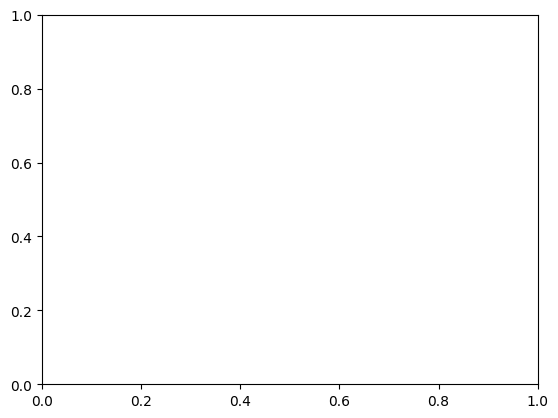

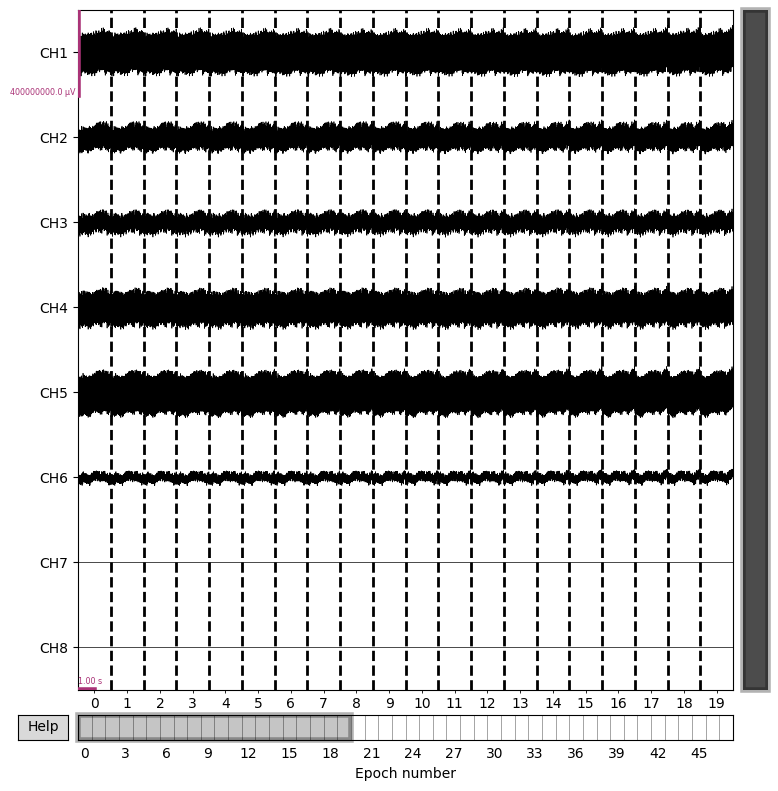

Setting up band-pass filter from 8 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 8.00, 13.00 Hz: -6.02, -6.02 dB



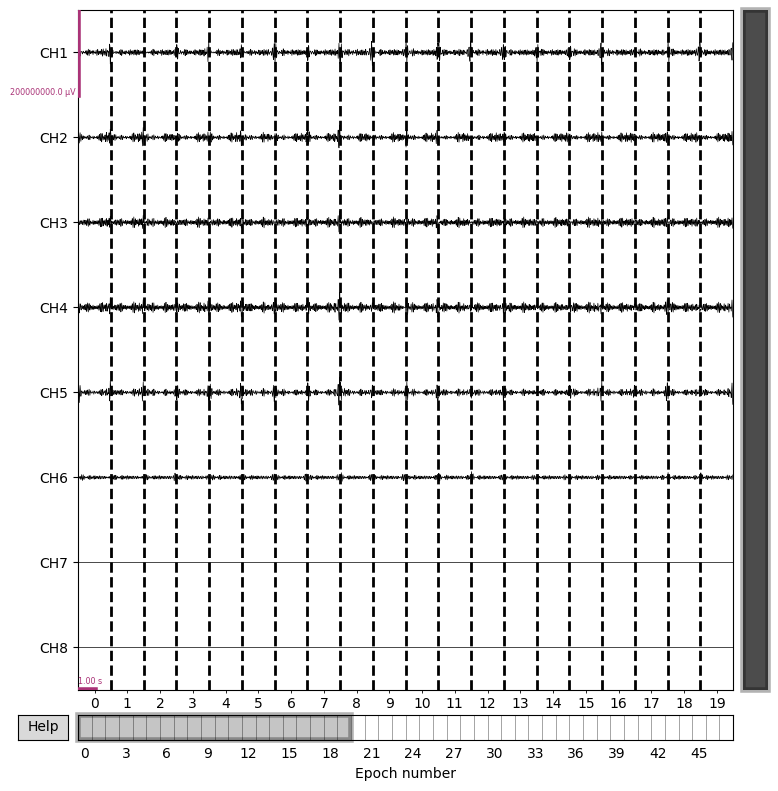

...


In [45]:
mne_epochs.plot(scalings = 200)
mne_epochs.filter(l_freq=8.0, h_freq=13.0, method = 'iir', iir_params= {"order": 6, "ftype":'butter'}).plot(scalings = 100)
print('...')

In [46]:
print(mne_epochs.get_data().shape)
mne_epochs.get_data()

(48, 8, 501)


array([[[-6.92590516e-03, -4.78117927e+00, -9.21997059e+00, ...,
         -1.69033298e+01, -8.78344992e+00, -9.50233346e-03],
        [ 4.43128648e-03,  3.63323586e+00,  7.02235688e+00, ...,
          1.30112896e+01,  6.76872290e+00, -5.66598709e-04],
        [ 3.21553225e-03,  1.37679407e+00,  2.66720967e+00, ...,
          1.03936171e+01,  5.41609932e+00,  5.54363951e-05],
        ...,
        [-5.71818182e-04, -1.16097470e+00, -2.21387022e+00, ...,
         -1.71915140e+00, -9.04301809e-01, -6.12366934e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-3.02168211e-05,  3.93059857e+00,  7.57412099e+00, ...,
         -2.80958460e+00, -1.47054332e+00,  4.86696818e-03],
        [ 4.01956294e-03,  1.26577104e+00,  2.44974197e+00, ...,
          1.25893396e+01,  6.54236537e

In [47]:
mne_epochs.to_data_frame()

,time,condition,epoch,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8
0,-0.500,Right cue start,0,-6.925905e+03,4.431286e+03,3.215532e+03,6.231781e+03,6.908131e+03,-5.718182e+02,0.0,0.0
1,-0.496,Right cue start,0,-4.781179e+06,3.633236e+06,1.376794e+06,4.006794e+06,7.346009e+06,-1.160975e+06,0.0,0.0
2,-0.492,Right cue start,0,-9.219971e+06,7.022357e+06,2.667210e+06,7.747047e+06,1.418215e+07,-2.213870e+06,0.0,0.0
3,-0.488,Right cue start,0,-1.301355e+07,9.948543e+06,3.796675e+06,1.098529e+07,2.004950e+07,-3.062343e+06,0.0,0.0
4,-0.484,Right cue start,0,-1.590100e+07,1.221993e+07,4.697550e+06,1.351514e+07,2.455311e+07,-3.629544e+06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
24043,1.484,Left blank start,47,-8.585494e+06,1.034142e+07,8.882250e+06,1.413738e+07,1.723438e+07,-1.047083e+07,0.0,0.0
24044,1.488,Left blank start,47,-7.092404e+06,8.593662e+06,7.383115e+06,1.169551e+07,1.416165e+07,-8.649964e+06,0.0,0.0
24045,1.492,Left blank start,47,-5.056346e+06,6.149561e+06,5.283327e+06,8.344094e+06,1.005946e+07,-6.166332e+06,0.0,0.0
24046,1.496,Left blank start,47,-2.630561e+06,3.207311e+06,2.753972e+06,4.342604e+06,5.224502e+06,-3.206571e+06,0.0,0.0


In [48]:
labels = mne_epochs.events[:,2]
labels

array([4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5,
       6, 1, 2, 3])

# Stream raw mne data to LSL in real-time

In [53]:
import matplotlib.pyplot as plt

from mne.datasets import sample
from mne.io import read_raw_fif

from mne_realtime import LSLClient, MockLSLStream

print(__doc__)

host = 'My_mne_stream'
wait_max = 5

if __name__ == '__main__':
    with MockLSLStream(host, raw_mne, 'eeg'):
        with LSLClient(info=raw_mne.info, host=host, wait_max=wait_max) as client:
            client_info = client.get_measurement_info()
            while True:
                pass

Automatically created module for IPython interactive environment
Client: Waiting for server to start
Looking for LSL stream My_mne_stream...
My_mne_stream not found in streams: []
Looking for LSL stream My_mne_stream...
Found stream 'MNE' via My_mne_stream...
Client: Connected


KeyboardInterrupt: 